In [212]:
#Source: https://catalog.data.gov/dataset/age-adjusted-death-rates-for-the-top-10-leading-causes-of-death-united-states-2013/resource/0e603f1d-31bf-4809-8f10-a994b305b379
        
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
url = "https://data.cdc.gov/api/views/bi63-dtpu/rows.csv?accessType=DOWNLOAD"
data = pd.read_csv(url)#,index_col="Year")

In [213]:
data.info() #482.6KB, 412.6KB 14.5% reduction in memory space required

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10296 entries, 0 to 10295
Data columns (total 6 columns):
Year                       10296 non-null int64
113 Cause Name             10296 non-null object
Cause Name                 10296 non-null object
State                      10296 non-null object
Deaths                     10296 non-null int64
Age-adjusted Death Rate    10296 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 482.7+ KB


In [214]:
data.sort_index(inplace=True)


In [215]:
data.drop("113 Cause Name",axis=1,inplace=True)


In [216]:
data["Cause Name"] = data["Cause Name"].astype("category")

In [217]:
data

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2012,Kidney disease,Vermont,21,2.6
1,2016,Kidney disease,Vermont,30,3.7
2,2013,Kidney disease,Vermont,30,3.8
3,2000,Suicide,District of Columbia,23,3.8
4,2014,Kidney disease,Arizona,325,4.1
5,2009,Suicide,District of Columbia,29,4.4
6,2011,Kidney disease,South Dakota,49,4.5
7,2015,Kidney disease,Vermont,39,4.5
8,2014,Kidney disease,Vermont,37,4.5
9,2013,Kidney disease,Arizona,374,4.9


In [218]:
data["Year"].sort_values(ascending=False)

5147     2016
3697     2016
9066     2016
3403     2016
3426     2016
3475     2016
3514     2016
3579     2016
3587     2016
3601     2016
3622     2016
3642     2016
3677     2016
3679     2016
3704     2016
4008     2016
3706     2016
8990     2016
3783     2016
3808     2016
3821     2016
3824     2016
8966     2016
3851     2016
3925     2016
3945     2016
3950     2016
7582     2016
3396     2016
9076     2016
         ... 
7422     1999
1988     1999
10114    1999
4054     1999
6945     1999
4041     1999
4039     1999
4133     1999
4135     1999
1915     1999
6992     1999
1866     1999
1868     1999
5331     1999
8899     1999
6404     1999
10100    1999
4159     1999
5338     1999
1890     1999
1914     1999
1901     1999
1902     1999
8487     1999
5350     1999
8906     1999
1906     1999
6407     1999
1911     1999
10295    1999
Name: Year, Length: 10296, dtype: int64

In [219]:
cause=data["Deaths"].groupby([data["Year"],data["State"],data["Cause Name"]])

In [220]:
my_pivot_deaths = data.pivot_table(values = ["Deaths"],
                 index = ["Cause Name"],
                columns="State")

In [221]:
my_pivot_deaths

Deaths                             \
State                         Alabama       Alaska       Arizona   
Cause Name                                                         
All causes               47823.833333  3521.000000  46561.500000   
Alzheimer's disease       1479.833333    66.888889   1988.833333   
CLRD                      2654.333333   171.833333   2929.444444   
Cancer                   10043.333333   835.111111  10275.444444   
Diabetes                  1341.277778    99.444444   1401.944444   
Heart disease            12635.166667   672.611111  10725.722222   
Influenza and pneumonia   1028.666667    51.833333   1011.555556   
Kidney disease            1049.944444    40.500000    520.055556   
Stroke                    2861.500000   172.611111   2337.666667   
Suicide                    624.500000   148.888889   1014.333333   
Unintentional injuries    2398.222222   350.444444   2997.777778   

                                                                    \
State                        Arkansas     California      Colorado   
Cause Name                                                           
All causes               29053.611111  239281.277778  31183.222222   
Alzheimer's disease        835.722222    9246.555556   1171.000000   
CLRD                      1734.444444   13081.500000   2099.611111   
Cancer                    6393.000000   55706.611111   6769.111111   
Diabetes                   834.888889    7431.611111    747.000000   
Heart disease             7687.333333   63432.000000   6378.666667   
Influenza and pneumonia    756.000000    6758.944444    647.944444   
Kidney disease             636.277778    2688.111111    431.055556   
Stroke                    1871.444444   15447.277778   1701.888889   
Suicide                    432.388889    3617.333333    857.055556   
Unintentional injuries    1411.222222   10784.500000   2110.444444   

                                                                         \
State                     Connecticut     Delaware District of Columbia   
Cause Name                                                                
All causes               29518.111111  7555.277778          5230.888889   
Alzheimer's disease        751.277778   184.611111           111.333333   
CLRD                      1423.333333   408.722222           145.000000   
Cancer                    6907.055556  1845.388889          1159.166667   
Diabetes                   689.611111   213.722222           167.555556   
Heart disease             7702.333333  1913.444444          1457.500000   
Influenza and pneumonia    748.666667   150.444444            87.222222   
Kidney disease             570.666667   148.944444            68.611111   
Stroke                    1550.555556   406.166667           231.555556   
Suicide                    319.833333   102.611111            35.722222   
Unintentional injuries    1352.555556   344.833333           214.388889   

                                        ...                               \
State                          Florida  ...     Tennessee          Texas   
Cause Name                              ...                                
All causes               173951.277778  ...  59265.111111  164957.055556   
Alzheimer's disease        4714.222222  ...   2088.277778    5120.888889   
CLRD                       9967.444444  ...   3408.611111    8546.500000   
Cancer                    40975.111111  ...  13210.500000   35883.555556   
Diabetes                   5007.277778  ...   1751.777778    5270.333333   
Heart disease             45342.333333  ...  15142.611111   40751.722222   
Influenza and pneumonia    2748.166667  ...   1557.555556    3357.000000   
Kidney disease             2686.277778  ...    836.222222    3120.277778   
Stroke                     9583.000000  ...   3553.222222    9866.500000   
Suicide                    2633.722222  ...    893.055556    2658.000000   
Unintentional injuries     8620.944444  ...   3283.277778 

In [222]:
cancer = my_pivot_deaths.loc["Cancer"].sort_values(ascending=False)[1:6]


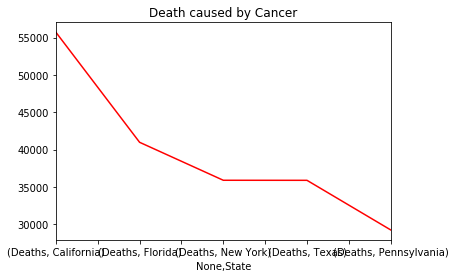

In [223]:
cancer.plot(color='red',label="death caused by cancer",title="Death caused by Cancer")

In [224]:
suicide = my_pivot_deaths.loc[("Suicide")].sort_values(ascending=False)[1:4]
suicide

        State     
Deaths  California    3617.333333
        Texas         2658.000000
        Florida       2633.722222
Name: Suicide, dtype: float64

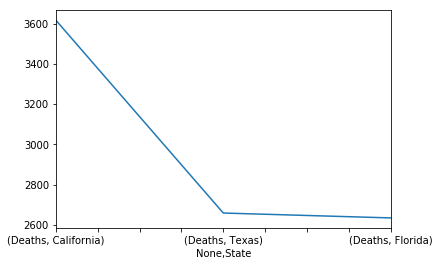

In [225]:
my_pivot_deaths.loc[("Suicide")].sort_values(ascending=False)[1:4].plot()

In [226]:
my_pivot_deaths.loc[("Diabetes")].sort_values(ascending=False)[1:4]

        State     
Deaths  California    7431.611111
        Texas         5270.333333
        Florida       5007.277778
Name: Diabetes, dtype: float64

In [227]:
my_pivot_deaths.loc[("Alzheimer's disease")].sort_values(ascending=False)[1:4]

        State     
Deaths  California    9246.555556
        Texas         5120.888889
        Florida       4714.222222
Name: Alzheimer's disease, dtype: float64

In [228]:
t=my_pivot_deaths.transpose()

In [229]:
t

Cause Name                     All causes  Alzheimer's disease           CLRD  \
       State                                                                    
Deaths Alabama               4.782383e+04          1479.833333    2654.333333   
       Alaska                3.521000e+03            66.888889     171.833333   
       Arizona               4.656150e+04          1988.833333    2929.444444   
       Arkansas              2.905361e+04           835.722222    1734.444444   
       California            2.392813e+05          9246.555556   13081.500000   
       Colorado              3.118322e+04          1171.000000    2099.611111   
       Connecticut           2.951811e+04           751.277778    1423.333333   
       Delaware              7.555278e+03           184.611111     408.722222   
       District of Columbia  5.230889e+03           111.333333     145.000000   
       Florida               1.739513e+05          4714.222222    9967.444444   
       Georgia               6.994767e+04          2035.111111    3654.000000   
       Hawaii                9.571833e+03           223.388889     298.555556   
       Idaho                 1.112056e+04           380.833333     698.944444   
       Illinois              1.040107e+05          2818.444444    5156.722222   
       Indiana               5.731589e+04          1804.888889    3607.833333   
       Iowa                  2.818178e+04          1142.555556    1743.611111   
       Kansas                2.493733e+04           784.111111    1540.833333   
       Kentucky              4.181417e+04          1258.611111    2740.555556   
       Louisiana             4.199761e+04          1344.944444    1887.666667   
       Maine                 1.288011e+04           476.000000     824.055556   
       Maryland              4.447344e+04           929.055556    1969.222222   
       Massachusetts         5.483756e+04          1646.666667    2639.833333   
       Michigan              8.888633e+04          2605.944444    4861.500000   
       Minnesota             3.901639e+04          1388.111111    2032.833333   
       Mississippi           2.923089e+04           824.888889    1551.722222   
       Missouri              5.601806e+04          1666.277778    3324.888889   
       Montana               8.804444e+03           258.888889     612.222222   
       Nebraska              1.544422e+04           511.000000     981.222222   
       Nevada                1.918233e+04           359.944444    1259.277778   
       New Hampshire         1.044444e+04           360.555556     630.611111   
       New Jersey            7.175422e+04          1764.277778    3076.166667   
       New Mexico            1.564517e+04           364.166667     943.222222   
       New York              1.523099e+05          2254.444444    6851.833333   
       North Carolina        7.772294e+04          2569.055556    4326.500000   
       North Dakota          5.965389e+03           322.666667     311.444444   
       Ohio                  1.104061e+05          3539.055556    6502.611111   
       Oklahoma              3.647450e+04           993.500000    2396.277778   
       Oregon                3.199794e+04          1258.000000    1897.388889   
       Pennsylvania          1.285491e+05          3318.888889    6269.777778   
       Rhode Island          9.796500e+03           319.222222     493.111111   
       South Carolina        4.070167e+04          1445.166667    2206.666667   
       South Dakota          7.149500e+03           324.888889     424.444444   
       Tennessee             5.926511e+04          2088.277778    3408.611111   
       Texas                 1.649571e+05          5120.888889    8546.500000   
       United States         2.495281e+06         76300.666667  135262.555556   
       Utah                  1.447278e+04           435.388889     640.888889   
       Vermont               5.302389e+03           212.333333     331.000000   
       Virginia              5.

In [230]:
t.loc[("Deaths","Wisconsin")].sort_values()

Cause Name
Suicide                      716.111111
Kidney disease               936.611111
Influenza and pneumonia     1103.777778
Diabetes                    1272.333333
Alzheimer's disease         1607.055556
CLRD                        2494.500000
Unintentional injuries      2583.166667
Stroke                      2910.333333
Cancer                     11070.388889
Heart disease              11862.611111
All causes                 47646.222222
Name: (Deaths, Wisconsin), dtype: float64

In [231]:
t.loc[("Deaths","California")].sort_values(ascending=False)[1:4]

Cause Name
Heart disease    63432.000000
Cancer           55706.611111
Stroke           15447.277778
Name: (Deaths, California), dtype: float64

In [232]:
t.loc[("Deaths","Kansas")].sort_values(ascending=False)[1:4]

Cause Name
Heart disease    5922.277778
Cancer           5394.500000
Stroke           1541.222222
Name: (Deaths, Kansas), dtype: float64

In [233]:
t.loc[("Deaths","Wyoming")].sort_values(ascending=True)[1:4]

Cause Name
Suicide                    116.222222
Influenza and pneumonia    117.222222
Diabetes                   119.222222
Name: (Deaths, Wyoming), dtype: float64

In [234]:
t.loc[("Deaths","Arkansas")].sort_values(ascending=True)[1:4]

Cause Name
Kidney disease             636.277778
Influenza and pneumonia    756.000000
Diabetes                   834.888889
Name: (Deaths, Arkansas), dtype: float64

In [235]:
t.loc[("Deaths","Wisconsin")].sort_values(ascending=False)[1:4]

Cause Name
Heart disease    11862.611111
Cancer           11070.388889
Stroke            2910.333333
Name: (Deaths, Wisconsin), dtype: float64

In [236]:
t["All causes"].sort_values(ascending=False)

        State               
Deaths  United States           2.495281e+06
        California              2.392813e+05
        Florida                 1.739513e+05
        Texas                   1.649571e+05
        New York                1.523099e+05
        Pennsylvania            1.285491e+05
        Ohio                    1.104061e+05
        Illinois                1.040107e+05
        Michigan                8.888633e+04
        North Carolina          7.772294e+04
        New Jersey              7.175422e+04
        Georgia                 6.994767e+04
        Virginia                5.951094e+04
        Tennessee               5.926511e+04
        Indiana                 5.731589e+04
        Missouri                5.601806e+04
        Massachusetts           5.483756e+04
        Washington              4.809378e+04
        Alabama                 4.782383e+04
        Wisconsin               4.764622e+04
        Arizona                 4.656150e+04
        Maryland          

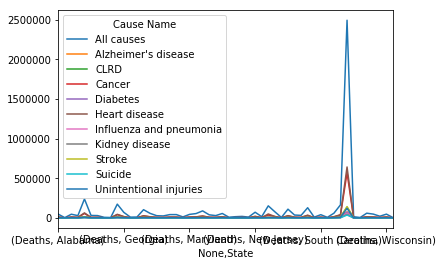

In [237]:
tt=t.drop("All causes",axis=1)
t.plot()

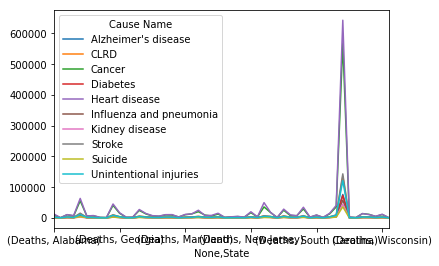

In [238]:
tt.plot()

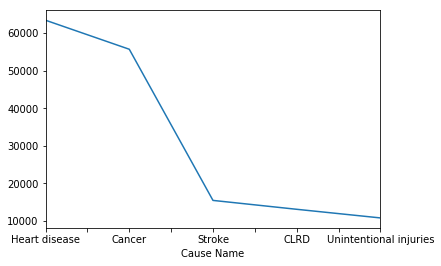

In [239]:
tt.loc[("Deaths","California")].nlargest(5).plot()

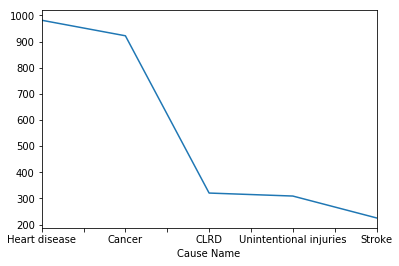

In [240]:
tt.loc[("Deaths","Wyoming")].nlargest(5).plot()

In [241]:
my_pivot_deaths.columns

MultiIndex(levels=[['Deaths'], ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'United States', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']],
           codes=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 

In [242]:
my_pivot_deaths.index

CategoricalIndex(['All causes', 'Alzheimer's disease', 'CLRD', 'Cancer',
                  'Diabetes', 'Heart disease', 'Influenza and pneumonia',
                  'Kidney disease', 'Stroke', 'Suicide',
                  'Unintentional injuries'],
                 categories=['All causes', 'Alzheimer's disease', 'CLRD', 'Cancer', 'Diabetes', 'Heart disease', 'Influenza and pneumonia', 'Kidney disease', ...], ordered=False, name='Cause Name', dtype='category')